In [1]:
# used car price prediction
# weather prediction
# tour pacakge prediction (yatra)

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('used_cars_data.csv', index_col=0)

In [4]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
df.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006,6019.000000
unique,2041,11,NaN,NaN,5,2,4,450,150,386,NaN,625,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,63.71 Lakh,NaN
freq,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,6,NaN
mean,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN,9.479468
std,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN,11.187917
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [7]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [8]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [9]:
for col in df.columns:
    print(f'{col}:{df[col].nunique()}')
    print(df[col].unique())
    print('-'*20)

Name:2041
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
--------------------
Location:11
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
--------------------
Year:23
[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998 1996]
--------------------
Kilometers_Driven:3660
[72000 41000 46000 ... 89411 52262 72443]
--------------------
Fuel_Type:5
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
--------------------
Transmission:2
['Manual' 'Automatic']
--------------------
Owner_Type:4
['First' 'Second' 'Fourth & Above' 'Third']
--------------------
Mileage:450
['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' 

In [10]:
target_col= 'Price'
cat_cols= ['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type']
num_cols=['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
drop_cols= ['Name', 'New_Price']


Location
Ahmedabad     275
Bangalore     440
Chennai       591
Coimbatore    772
Delhi         660
Hyderabad     876
Jaipur        499
Kochi         772
Kolkata       654
Mumbai        949
Pune          765
Name: Location, dtype: int64


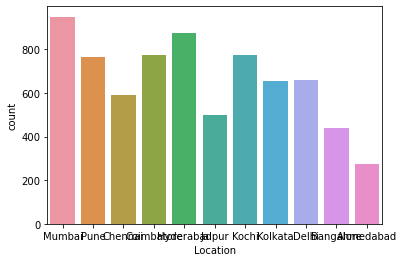

Year
1996      1
1998      4
1999      2
2000      5
2001      8
2002     18
2003     20
2004     35
2005     68
2006     89
2007    148
2008    207
2009    252
2010    407
2011    579
2012    690
2013    791
2014    925
2015    929
2016    886
2017    709
2018    361
2019    119
Name: Year, dtype: int64


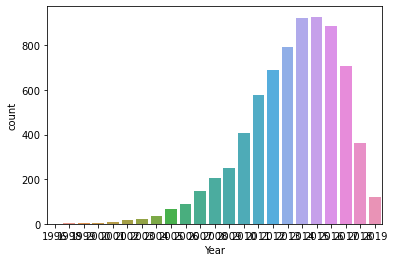

Fuel_Type
CNG           62
Diesel      3852
Electric       2
LPG           12
Petrol      3325
Name: Fuel_Type, dtype: int64


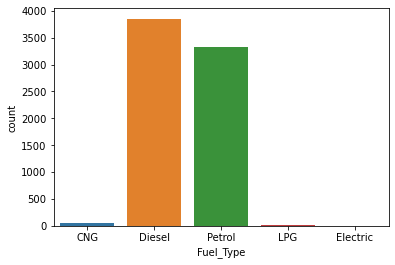

Transmission
Automatic    2049
Manual       5204
Name: Transmission, dtype: int64


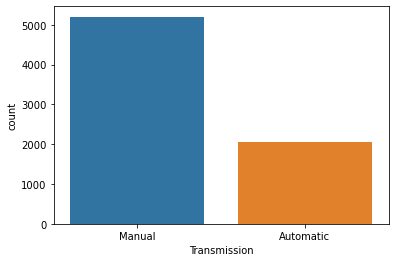

Owner_Type
First             5952
Fourth & Above      12
Second            1152
Third              137
Name: Owner_Type, dtype: int64


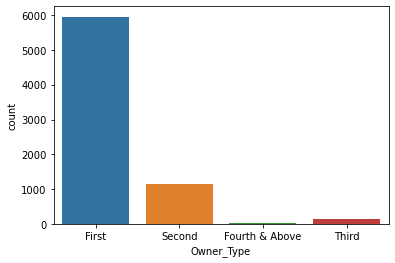

In [11]:
def cat_analyze(col):
    print(col)
    print(df[col].value_counts().sort_index())
    sns.countplot(data=df, x=col)
    plt.show()

for col in cat_cols:
    cat_analyze(col)    

In [12]:
df['Mileage'].head()

S.No.
0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
Name: Mileage, dtype: object

In [13]:
df['Mileage'].str.split().str.get(0)

S.No.
0        26.6
1       19.67
2        18.2
3       20.77
4        15.2
        ...  
7248    20.54
7249    17.21
7250    23.08
7251     17.2
7252     10.0
Name: Mileage, Length: 7253, dtype: object

In [14]:
mileage= df['Mileage'].str.split().str.get(0)
mileage.sample(5)

S.No.
2315     20.4
4918     15.8
2987    17.01
3294     18.6
1038     10.2
Name: Mileage, dtype: object

In [15]:
pd.isnull(mileage).sum()

2

In [16]:
#missing data
100*pd.isnull(df).sum()/len(df)

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [17]:
df.drop(drop_cols, axis=1, inplace= True)

In [18]:
100*pd.isnull(df).sum()/len(df)

Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
Price                17.013650
dtype: float64

In [19]:
df['Name'].str.split().str.get(0).value_counts()

KeyError: 'Name'

In [ ]:
df['Name'].str.lower().str.split().str.get(0).value_counts()

KeyError: 'Name'